In [3]:
# Importing libraries
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# scikit-learn imports
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# TensorFlow imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')


**Step2: Dataset Acquisition and Preparation**

In [4]:
# getting breast cancer dataset
data = datasets.load_breast_cancer()

In [5]:
# describing breast cancer dataset
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
# converting to dataframe
df_bc = pd.DataFrame(data = data.data, columns = data.feature_names)

In [7]:
# getting target
df_bc['target'] = data.target

In [8]:
# verifying information
df_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
# verifying dataset structure
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# verifying dataset shape
df_bc.shape

(569, 31)

In [11]:
# describing basic measures of dataset
df_bc.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
# verifying null values
df_bc.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [13]:
# removing duplicated rows
df_bc.drop_duplicates(keep='first', inplace=True)

In [14]:
# verifying values of target column
df_bc['target'].unique()

array([0, 1])

In [15]:
# splitting the data into input and output variables
X = df_bc.drop('target', axis=1)
y = df_bc['target']

In [16]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


**Step 3: Feature Selection**

*Selection of the best features using the SelectKBest technique is determined by a scoring function that evaluates how well each feature relates to the target variable. The higher the score for a feature, the more relevant it is considered.*

In [18]:
# Selecting the top 10 features using Univariate Feature Selection
k = 10
kb_sel = SelectKBest(score_func=f_regression, k=k)
X_selected = kb_sel.fit_transform(X, y)

# getting the indices of the selected features
selected_indices = np.argsort(kb_sel.scores_)[::-1][:k]
selected_features = X.columns[selected_indices]

# Print selected features
print("Selected features:")
print(selected_features)

Selected features:
Index(['worst concave points', 'worst perimeter', 'mean concave points',
       'worst radius', 'mean perimeter', 'worst area', 'mean radius',
       'mean area', 'mean concavity', 'worst concavity'],
      dtype='object')


In [19]:
# selecting the best ranked columns
X = X[['worst concave points',
       'worst perimeter',
       'mean concave points',
       'worst radius',
       'mean perimeter',
       'worst area',
       'mean radius',
       'mean area',
       'mean concavity',
       'worst concavity']]

In [20]:
# verifying the new structure of X
X

,worst concave points,worst perimeter,mean concave points,worst radius,mean perimeter,worst area,mean radius,mean area,mean concavity,worst concavity
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000
...,...,...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,0.9387


In [21]:
# splitting train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

**Step 4: Grid Search CV for Model Tuning**

In [23]:
# creating an MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# Train the model on the training data
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [24]:
# Making predictions on the test data
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [25]:
# classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**Step 5: Implementing an Artificial Neural Network (ANN) Model**

In [26]:
# initialization of the model
ann = tf.keras.models.Sequential()

# adding input layers and hidden layer 1
ann.add(tf.keras.layers.Dense(units = 6,
                              activation = 'relu',
                              input_shape = (X_train.shape[1],)))

# adding another hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# adding output layer
# in this case sigmoid is used because is a binary prediction (0 / 1)
ann.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [27]:
# compiling the model
# adam --> mini bacth gradient descent
# binary_crossentropy --> This cross-entropy loss is used for binary (0 or 1) classification applications
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Note:** *EarlyStopping is a useful callback whereby we can stop the fitting process if metrics are not getting better. The main objective is to avoid overfitting, but additionally it has other benefits, for example saving time and processing resources.*

In [28]:
# defining callbacks
# monitor --> measure to monitor, accuracy in this case
# mode --> max because accuracy should increase and we want max accuracy
# patience --> maximun times to wait for the process to get better
# min_delta --> Minimum change in the monitored quantity to qualify as an improvement
# verbose --> to show results for each epoch

early_stopping = EarlyStopping(monitor   = 'val_accuracy',
                               mode      = 'max',
                               patience  = 5,
                               min_delta = 0.01,
                               verbose   = 1)

In [29]:
# fitting the model and saving history
# x_train --> train dataset
# y_train --> train target
# batch_size --> number of rows to take at once
# epochs  --> number of epochs
# validation_split --> define 20% of the dataset for validation tasks
# callbacks --> add early_stopping callbacks

hist = ann.fit(X_train,
               y_train,
               batch_size       = 32,
               epochs           = 40,
               validation_split = 0.2,
               callbacks = [early_stopping])

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4174 - loss: 0.7536 - val_accuracy: 0.4615 - val_loss: 0.7063
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5128 - loss: 0.6547 - val_accuracy: 0.6484 - val_loss: 0.6135
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7046 - loss: 0.5737 - val_accuracy: 0.8132 - val_loss: 0.5337
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7950 - loss: 0.5172 - val_accuracy: 0.8901 - val_loss: 0.4668
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9106 - loss: 0.4462 - val_accuracy: 0.9011 - val_loss: 0.4106
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9384 - loss: 0.3838 - val_accuracy: 0.9231 - val_loss: 0.3651
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9240 - loss: 0.3598 - val_accuracy: 0.9231 - val_loss: 0.3285
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9184 - loss: 0.3076 - val_accuracy: 0.9231 - val_loss

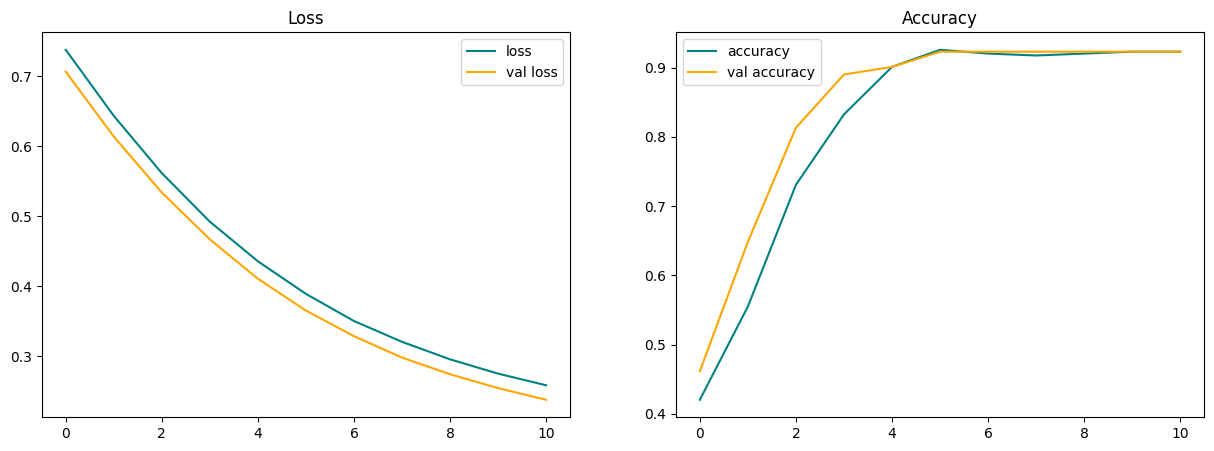

In [30]:
# ploting total loss and accuracy for train and validation datasets
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

ax[0].plot(hist.history['loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['accuracy'], color='teal', label='accuracy')
ax[1].plot(hist.history['val_accuracy'], color='orange', label='val accuracy')
ax[1].title.set_text('Accuracy')
ax[1].legend()

plt.show()

In [31]:
# making predictions on test dataset
y_pred = ann.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [32]:
# evaluating the model
test_loss, test_acc = ann.evaluate(X_test, y_test, verbose = 2)

print (f'Accuracy ==> {test_acc:.2f}')
print (f'Loss     ==> {test_loss:.2f}')

4/4 - 0s - 8ms/step - accuracy: 0.9737 - loss: 0.2137
Accuracy ==> 0.97
Loss     ==> 0.21


In [41]:
# saving scaler
joblib.dump(sc, "scaler.pkl")

['scaler.pkl']

In [34]:
# saving the model
ann.save('breast_cancer.h5')